https://www.kaggle.com/mmkvarma/cryotherapy-analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import sklearn
from scipy.stats import sem
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
df = pd.read_excel('Cryotherapy.xlsx')

In [4]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [5]:
df.shape

(90, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
sex                    90 non-null int64
age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [7]:
df.columns

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'Result_of_Treatment'],
      dtype='object')

In [8]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000363A3DB898>,
      dtype=object)

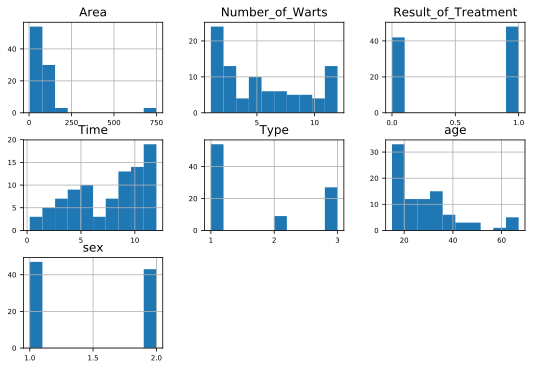

In [9]:
df.hist(figsize=(9, 6), xlabelsize=7, ylabelsize=7)

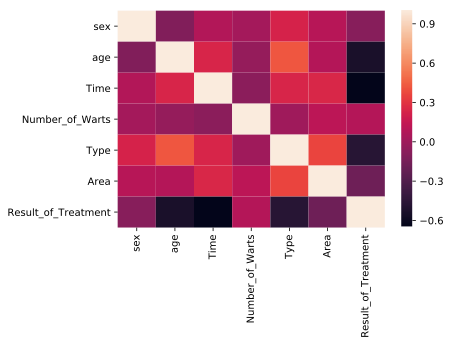

In [10]:
sns.heatmap(df.corr())

In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [12]:
X = df[['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area']]
y = df[['Result_of_Treatment']]

# BaggingClassifier

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
KNN_bag = KNeighborsClassifier()

In [15]:
bag_knn = BaggingClassifier(KNN_bag)

In [16]:
param_grid = dict(n_neighbors=range(1,11), weights=['uniform', 'distance'])

In [17]:
grid_search = GridSearchCV(KNN_bag, param_grid, cv=5, scoring = 'accuracy')

In [18]:
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [20]:
grid_search.best_score_

0.9444444444444444

In [21]:
parameters = dict(n_estimators=[5, 10],
              max_features=range(1, 7),
              bootstrap_features=['False', 'True'],
              bootstrap=['True', 'False'])

In [22]:
KNN_bag = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [23]:
grid_search = GridSearchCV(estimator = bag_knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [24]:
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10], 'max_features': range(1, 7), 'bootstrap_features': ['False', 'True'], 'bootstrap': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
grid_search.best_params_

{'bootstrap': 'False',
 'bootstrap_features': 'False',
 'max_features': 6,
 'n_estimators': 10}

In [26]:
bag_score = grid_search.best_score_
bag_score

0.9111111111111111

# RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_clf = RandomForestClassifier()

In [29]:
parameters = dict(n_estimators=[5, 10], max_depth=range(1,6), bootstrap=['True', 'False'])

In [30]:
grid_search = GridSearchCV(estimator = rf_clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [31]:
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10], 'max_depth': range(1, 6), 'bootstrap': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
grid_search.best_params_

{'bootstrap': 'False', 'max_depth': 5, 'n_estimators': 10}

In [33]:
rf_score = grid_search.best_score_
rf_score

0.9444444444444444

# Linear classifier

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_clf = LogisticRegression()

In [36]:
parameters = dict(penalty=['l1', 'l2'], fit_intercept=[True, False], class_weight=[None, 'balanced'])

In [37]:
grid_search = GridSearchCV(estimator = lr_clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [38]:
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'fit_intercept': [True, False], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
grid_search.best_params_

{'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1'}

In [40]:
lr_score = grid_search.best_score_
lr_score

0.9

# k Nearest Neighbors classifier 

the same code as was used in bagging...

In [41]:
KNN_bag = KNeighborsClassifier()

In [42]:
param_grid = dict(n_neighbors=range(1,11), weights=['uniform', 'distance'])

In [43]:
grid_search = GridSearchCV(KNN_bag, param_grid, cv=5, scoring = 'accuracy')

In [44]:
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [46]:
knn_score = grid_search.best_score_
knn_score

0.9444444444444444

# Comparing models' accuracy

In [47]:
best_score = [('Bagging(knn)', bag_score), ('RandomForest', rf_score), ('LogisticRegression', lr_score), 
                  ('KNearestNeighbors', knn_score)]
best_score.sort(key=lambda x: x[1], reverse=True)
best_score

[('RandomForest', 0.9444444444444444),
 ('KNearestNeighbors', 0.9444444444444444),
 ('Bagging(knn)', 0.9111111111111111),
 ('LogisticRegression', 0.9)]

# Creating an ensemble of models

In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
ans_clf = VotingClassifier(estimators=[('bag_knn', BaggingClassifier(KNN_bag, bootstrap=False, bootstrap_features=False, max_features=4, n_estimators=10)),
                                      ('rf_clf', RandomForestClassifier(bootstrap=True, max_depth=5, n_estimators=5)),
                                      ('lr_clf', LogisticRegression(class_weight='balanced', fit_intercept=True, penalty='l1')),
                                      ('KNN_bag', KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [50]:
parameters = dict(voting = ['hard', 'soft'])

In [51]:
grid_search = GridSearchCV(ans_clf, cv=5, param_grid=parameters, refit=False, scoring = ['accuracy', 'precision', 'recall'])

In [52]:
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=VotingClassifier(estimators=[('bag_knn', BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=Fal...   weights='distance'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'voting': ['hard', 'soft']}, pre_dispatch='2*n_jobs',
       refit=False, return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=0)

In [53]:
print('Accuracy: ', grid_search.cv_results_['mean_test_accuracy'].mean())

Accuracy:  0.9388888888888889


In [54]:
print('Precision: ', grid_search.cv_results_['mean_test_precision'].mean())

Precision:  0.981111111111111


In [55]:
print('Recall: ', grid_search.cv_results_['mean_test_recall'].mean())

Recall:  0.9052469135802469
